# Preprocessing

## Load libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from apyori import apriori
import numpy as np

from sklearn.preprocessing import LabelEncoder

## Import data

### Main dataset

In [3]:
# main dataset
laundry = pd.read_csv('LaundryData.csv') 
laundry.columns = map(str.upper, laundry.columns)
laundry.head()

,NO,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE_RANGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,ATTIRE,SHIRT_COLOUR,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,black,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


### Additional dataset

In [4]:
# import additional dataset: Taman perumahan by state = kelantan, negeri sembilan, pahang, perak
residentsKelantan = pd.read_excel('TamanPerumahan/KELANTAN.xlsx', skiprows=3)
residentsKelantan = residentsKelantan.iloc[:563,:]
display(residentsKelantan.head())
residentsPerak = pd.read_excel('TamanPerumahan/PENGKALANHULU.xlsx', skiprows=3)
residentsPerak = residentsPerak.iloc[:23,:]
display(residentsPerak.head())
residentsPahang = pd.read_excel('TamanPerumahan/PAHANG.xlsx', skiprows=2)
residentsPahang = residentsPahang.iloc[:40,:]
display(residentsPahang.head())
residentsN9 = pd.read_csv('TamanPerumahan/NEGERISEMBILAN.csv', encoding='cp1252')
display(residentsN9.head())

,JAJAHAN,PBT,NAMA PERUMAHAN,LATITUDE,LONGITUDE,BIL RUMAH (UNIT)
0,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Mesra,4.875802,101.962055,193.0
1,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Wangsa Mewangi,4.872028,101.964018,231.0
2,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Bandar Baru,4.863622,101.959529,65.0
3,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Wisma Sri Galas,4.86336,101.961087,89.0
4,GUA MUSANG,MAJLIS DAERAH GUA MUSANG,Taman Titiwangsa,4.862772,101.954591,252.0


,BIL,NAMA TAMAN,KATEGORI RUMAH,BILANGAN UNIT,JENIS RUMAH
0,1.0,Taman Sentosa (RPA 1),Rendah,50,Teres Setingkat
1,2.0,Taman Damai (RPA 2),Rendah,40,Teres Setingkat
2,3.0,Taman Aman (RPA 3),Rendah,96,Teres Setingkat
3,4.0,Taman Bersatu,Sederhana,35,Teres Setingkat
4,5.0,Taman Mawar,Rendah,26,Teres Setingkat


,NO,NAMA TAMAN,MUKIM,POSKOD,BILANGAN RUMAH
0,1.0,Taman Maran Impian,MARAN,26500.0,141
1,2.0,Taman Sri Chedong,MARAN,26500.0,111
2,3.0,Taman Maran Jaya,MARAN,26500.0,298
3,4.0,Taman Sri Keramat,MARAN,26500.0,184
4,5.0,Taman Berkat Mutiara,MARAN,26500.0,36


,Bil,Nama Taman,Daerah,Mukim,Poskod,Bilangan Rumah
0,1,TAMAN SHUKOR,Seremban,AMPANGAN,70400,43
1,2,TAMAN DESA KENANGA INDAH,Seremban,AMPANGAN,70400,30
2,3,TAMAN VILLA PALMA,Seremban,AMPANGAN,70400,56
3,4,TAMAN SERI SENTOSA,Seremban,AMPANGAN,70400,28
4,5,RESIDENSI SIGC,Seremban,AMPANGAN,70400,217


## Preprocessing main dataset

### 1. What is the quick overview of the data?
Get overview of data

In [5]:
laundry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             807 non-null    int64  
 1   DATE           807 non-null    object 
 2   TIME           807 non-null    object 
 3   RACE           797 non-null    object 
 4   GENDER         793 non-null    object 
 5   BODY_SIZE      790 non-null    object 
 6   AGE_RANGE      799 non-null    float64
 7   WITH_KIDS      794 non-null    object 
 8   KIDS_CATEGORY  777 non-null    object 
 9   BASKET_SIZE    801 non-null    object 
 10  BASKET_COLOUR  798 non-null    object 
 11  ATTIRE         776 non-null    object 
 12  SHIRT_COLOUR   798 non-null    object 
 13  SHIRT_TYPE     770 non-null    object 
 14  PANTS_COLOUR   802 non-null    object 
 15  PANTS_TYPE     798 non-null    object 
 16  WASH_ITEM      784 non-null    object 
 17  WASHER_NO      807 non-null    int64  
 18  DRYER_NO  

### 2. Is there any missing values or duplicates data? If so, how do we want to deal with it?
Dealing null and duplicates data

In [6]:
# dearling wih missing values
laundry.isna().sum()

NO                0
DATE              0
TIME              0
RACE             10
GENDER           14
BODY_SIZE        17
AGE_RANGE         8
WITH_KIDS        13
KIDS_CATEGORY    30
BASKET_SIZE       6
BASKET_COLOUR     9
ATTIRE           31
SHIRT_COLOUR      9
SHIRT_TYPE       37
PANTS_COLOUR      5
PANTS_TYPE        9
WASH_ITEM        23
WASHER_NO         0
DRYER_NO          0
SPECTACLES        0
dtype: int64

In [7]:
# drop rows with null values
laundry = laundry.dropna()
laundry.shape

(642, 20)

In [8]:
# dealing with duplicates data
laundry.drop_duplicates()

,NO,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE_RANGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,ATTIRE,SHIRT_COLOUR,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES
0,1,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,white,short_sleeve,blue_jeans,long,clothes,6,9,no
2,3,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,clothes,4,10,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
8,9,20/10/2015,0:45:19,indian,male,thin,30.0,no,no_kids,small,purple,casual,white,short_sleeve,black,short,clothes,6,10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,09/12/2015,20:05:46,malay,female,moderate,45.0,no,no_kids,small,white,casual,red,long sleeve,black,long,clothes,3,10,no
803,804,09/12/2015,20:33:01,malay,male,fat,34.0,no,no_kids,big,grey,casual,white,short_sleeve,black,long,blankets,3,7,no
804,805,09/12/2015,20:37:01,malay,female,moderate,53.0,no,no_kids,big,purple,traditional,pink,long sleeve,pink,long,clothes,3,7,yes
805,806,09/12/2015,20:42:57,indian,female,moderate,37.0,no,no_kids,big,green,traditional,brown,short_sleeve,black,long,clothes,6,10,no


### 3. Are there any columns that require conversion of data type?
Data type conversion

In [9]:
# change TIME and DATE to it's corresponding data type
laundry['TIME'] = pd.to_datetime(laundry['TIME']).dt.time
laundry['DATE'] = pd.to_datetime(laundry['DATE'], format='%d/%m/%Y', errors='coerce')

In [10]:
str(type(laundry['TIME'][0]))

"<class 'datetime.time'>"

### 4. Can I add an extra data point?
Derived the existing column to add new columns

In [11]:
# Binning time into day and night 
# night = 7pm - 7am, day = 7am - 6.59pm
bins = ['19:00:00','07:00:00','18:59:59']
labels = ["Night","Day","Night"]

hours = pd.to_datetime(laundry['TIME'], format='%H:%M:%S').dt.hour
laundry['PART_OF_DAY'] = pd.cut(hours,  bins=[0,7,19,24], include_lowest=True,  labels=labels,ordered=False)
laundry['PART_OF_DAY'].head()

0    Night
1    Night
2    Night
4    Night
8    Night
Name: PART_OF_DAY, dtype: category
Categories (2, object): ['Day', 'Night']

In [12]:
# Binning date into days
days = laundry['DATE'].dt.dayofweek #gives only the index(0-monday,6-sunday)
mappingtoDays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

laundry['PART_OF_WEEK'] = days
laundry['PART_OF_WEEK'] = laundry['PART_OF_WEEK'].map(mappingtoDays)
laundry['PART_OF_WEEK'].head()

0     Monday
1     Monday
2     Monday
4     Monday
8    Tuesday
Name: PART_OF_WEEK, dtype: object

In [13]:
# Binning age into young, adult, senior citizen
laundry["AGE_CATEGORY"] = pd.cut(laundry["AGE_RANGE"], bins=[1,30,45,70], labels=["Young","Adults","Older adults"])
laundry['AGE_CATEGORY'].value_counts()

Adults          331
Older adults    248
Young            63
Name: AGE_CATEGORY, dtype: int64

### 5. Is there any outliers in the data? Is the outliers an error or else?
Outlier analysis


In [14]:
alt.Chart(laundry[['GENDER','AGE_RANGE']]).mark_boxplot(size=100).encode(
    x='GENDER',
    y='AGE_RANGE',
    color=alt.Color('GENDER')
).properties(width=1000, height=400)

alt.Chart(...)

## Preprocessing Additional Dataset

### 1. Is there any missing values or duplicates data? If so, how we want to deal with it?
Dealing null and duplicates data

In [15]:
print("Resident Negeri Sembilan:")
display(residentsN9.isna().sum())
print("Resident Pahang:")
display(residentsPahang.isna().sum())
print("Resident Perak:")
display(residentsPerak.isna().sum())
print("Resident Kelantan:")
display(residentsKelantan.isna().sum())

Resident Negeri Sembilan:


Bil               0
Nama Taman        0
Daerah            0
Mukim             0
Poskod            0
Bilangan Rumah    0
dtype: int64

Resident Pahang:


NO                0
NAMA TAMAN        0
MUKIM             0
POSKOD            0
BILANGAN RUMAH    0
dtype: int64

Resident Perak:


BIL               0
NAMA TAMAN        0
KATEGORI RUMAH    1
BILANGAN UNIT     0
JENIS RUMAH       2
dtype: int64

Resident Kelantan:


JAJAHAN             0
PBT                 0
NAMA PERUMAHAN      0
LATITUDE            0
LONGITUDE           0
BIL RUMAH (UNIT)    0
dtype: int64

### 2. How to visualize the content?
Merging dataset into one dataframe

In [16]:
# Declare dataframe for additional dataset
residentalLocation = pd.DataFrame(columns=['STATE','RESIDENTAL_AREA','DISTRICT','NUMBER_OF_HOUSES'])
residentalLocation

,STATE,RESIDENTAL_AREA,DISTRICT,NUMBER_OF_HOUSES


In [17]:
# add Negeri sembilan
for i in range(len(residentsN9)):
    residentalLocation = residentalLocation.append({'STATE': 'Negeri Sembilan', 'RESIDENTAL_AREA': residentsN9.iloc[[i]]['Nama Taman'].values[0],'DISTRICT': residentsN9.iloc[[i]]['Daerah'].values[0],'NUMBER_OF_HOUSES':residentsN9.iloc[[i]]['Bilangan Rumah'].values[0]}, ignore_index=True)

# add Kelantan
for i in range(len(residentsKelantan)):
    residentalLocation = residentalLocation.append({'STATE': 'Kelantan', 'RESIDENTAL_AREA': residentsKelantan.iloc[[i]]['NAMA PERUMAHAN'].values[0],'DISTRICT': residentsKelantan.iloc[[i]]['JAJAHAN'].values[0],'NUMBER_OF_HOUSES':residentsKelantan.iloc[[i]]['BIL RUMAH (UNIT)'].values[0]}, ignore_index=True)

# add Pahang
for i in range(len(residentsPahang)):
    residentalLocation = residentalLocation.append({'STATE': 'Pahang', 'RESIDENTAL_AREA': residentsPahang.iloc[[i]]['NAMA TAMAN'].values[0],'DISTRICT': residentsPahang.iloc[[i]]['MUKIM'].values[0],'NUMBER_OF_HOUSES':residentsPahang.iloc[[i]]['BILANGAN RUMAH'].values[0]}, ignore_index=True)

# add Perak
for i in range(len(residentsPerak)):
    residentalLocation = residentalLocation.append({'STATE': 'Perak', 'RESIDENTAL_AREA': residentsPerak.iloc[[i]]['NAMA TAMAN'].values[0],'DISTRICT': 'Pengkalan Hulu','NUMBER_OF_HOUSES':residentsPerak.iloc[[i]]['BILANGAN UNIT'].values[0]}, ignore_index=True)


In [18]:
residentalLocation

,STATE,RESIDENTAL_AREA,DISTRICT,NUMBER_OF_HOUSES
0,Negeri Sembilan,TAMAN SHUKOR,Seremban,43
1,Negeri Sembilan,TAMAN DESA KENANGA INDAH,Seremban,30
2,Negeri Sembilan,TAMAN VILLA PALMA,Seremban,56
3,Negeri Sembilan,TAMAN SERI SENTOSA,Seremban,28
4,Negeri Sembilan,RESIDENSI SIGC,Seremban,217
...,...,...,...,...
1742,Perak,Taman Sri Bayas,Pengkalan Hulu,66
1743,Perak,Taman Intan (RPA Klian Intan),Pengkalan Hulu,50
1744,Perak,RPA Klian Intan 2,Pengkalan Hulu,53
1745,Perak,Taman Bunga Raya,Pengkalan Hulu,30


### 3. Are there any columns that require conversion of data type? 
Changing Data Type

In [19]:
# change NUMBER_OF_HOUSES fro object to numerical data type
residentalLocation['NUMBER_OF_HOUSES'] = pd.to_numeric(residentalLocation['NUMBER_OF_HOUSES'], errors='coerce')
residentalLocation = residentalLocation.dropna()

### 4. Are there any outliers in the data? Is the outliers an error or else?
Outlier analysis

In [20]:
alt.Chart(residentalLocation).mark_boxplot(size=100).encode(
    x='STATE',
    y='NUMBER_OF_HOUSES',
    color=alt.Color('STATE')
).properties(width=1000, height=400)

alt.Chart(...)

# Exploratory Data Analysis

In [21]:
laundryAnalaysis = laundry.copy()
residentalLocationAnalysis = residentalLocation.copy()

### 1. How many customers visit during the day and night?

In [22]:
### 1. How many customers visit during the day and night?
bb = laundryAnalaysis.groupby(['DATE','PART_OF_DAY']).size().reset_index()
bb.rename(columns={0: 'FREQUENCY'}, inplace=True)


chartOverall1 = alt.Chart(bb).mark_bar().encode(
    x='DATE',
    y='FREQUENCY',
    color=alt.Color('PART_OF_DAY', scale=alt.Scale(range=["#F4D03F","#1A5276"]))
).properties(
    width=650  
)

print('Frequency of customer during the day: ', bb[bb['PART_OF_DAY']=='Day'].sum().values[0])
print('Frequency of customer during the night: ', bb[bb['PART_OF_DAY']=='Night'].sum().values[0])
chartOverall1

Frequency of customer during the day:  299
Frequency of customer during the night:  343


<ipython-input-22-5285ec1310e1>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Frequency of customer during the day: ', bb[bb['PART_OF_DAY']=='Day'].sum().values[0])
<ipython-input-22-5285ec1310e1>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Frequency of customer during the night: ', bb[bb['PART_OF_DAY']=='Night'].sum().values[0])


alt.Chart(...)

### 2. What type of customer visits laundry on weekend, weekdays, night and day ?

#### CUSTOMER TYPE BASED ON: AGE CATEGORY
##### weekend weekdays

In [23]:
ld2 = laundry.copy()

mappingtoWW = {'Monday': 'Weekdays','Tuesday': 'Weekdays','Wednesday': 'Weekdays','Thursday': 'Weekdays','Friday': 'Weekdays','Saturday': 'Weekend','Sunday': 'Weekend'}

ld2['WW'] = laundry['PART_OF_WEEK'].map(mappingtoWW)
ld2['WW'].head()

0    Weekdays
1    Weekdays
2    Weekdays
4    Weekdays
8    Weekdays
Name: WW, dtype: object

In [24]:
# groupby age
ac_ww = ld2.groupby(['WW','AGE_CATEGORY']).size().reset_index()
ac_ww.rename(columns={0: 'FREQUENCY'}, inplace=True)

# display result
print("age range information : ")
print("YOUNG : < 30")
print("ADULTS : 30 - 44")
print("OLDER ADULTS : > 44")
chartAge1 = alt.Chart(ac_ww).mark_bar().encode(
    x='WW',
    y='FREQUENCY',
    color=alt.Color('AGE_CATEGORY', scale=alt.Scale(range=["#581845","#C70039", "#FFC300"]))
).properties(
    width=250  
)

chartAge1

age range information : 
YOUNG : < 30
ADULTS : 30 - 44
OLDER ADULTS : > 44


alt.Chart(...)

##### Day and Night

In [25]:
ac_dn = ld2.groupby(['PART_OF_DAY','AGE_CATEGORY']).size().reset_index()
ac_dn.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartAge2 = alt.Chart(ac_dn).mark_bar().encode(
    x='PART_OF_DAY',
    y='FREQUENCY',
    color=alt.Color('AGE_CATEGORY', scale=alt.Scale(range=["#581845","#C70039", "#FFC300"]))
).properties(
    width=250  
)
chartAge2

alt.Chart(...)

#### CUSTOMER TYPE BASED ON: WITH_KIDS
##### weekend weekdays

In [26]:
k_ww = ld2.groupby(['WW','WITH_KIDS']).size().reset_index()
k_ww.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartWkids1 = alt.Chart(k_ww).mark_bar().encode(
    x='WW',
    y='FREQUENCY',
    color=alt.Color('WITH_KIDS', scale=alt.Scale(range=["#F5D787", "#A5F587"]))
).properties(
    width=250  
)


chartWkids1

alt.Chart(...)

##### Days and Night

In [27]:
k_dn = ld2.groupby(['PART_OF_DAY','WITH_KIDS']).size().reset_index()
k_dn.rename(columns={0: 'FREQUENCY'}, inplace=True)

chartWkids2 = alt.Chart(k_dn).mark_bar().encode(
    x='PART_OF_DAY',
    y='FREQUENCY',
    color=alt.Color('WITH_KIDS', scale=alt.Scale(range=["#F5D787", "#A5F587"]))
).properties(
    width=250  
)

chartWkids2

alt.Chart(...)

#### CLUSTERING - AGE RANGE

In [28]:
# get the data to cluster
cluster_data = ld2[['PART_OF_DAY','AGE_RANGE']]
cluster_data

,PART_OF_DAY,AGE_RANGE
0,Night,28.0
1,Night,32.0
2,Night,30.0
4,Night,34.0
8,Night,30.0
...,...,...
802,Night,45.0
803,Night,34.0
804,Night,53.0
805,Night,37.0


In [29]:
# perform dummification
X = pd.get_dummies(cluster_data['PART_OF_DAY'], drop_first=False)
X

,Day,Night
0,0,1
1,0,1
2,0,1
4,0,1
8,0,1
...,...,...
802,0,1
803,0,1
804,0,1
805,0,1


In [30]:
X.columns = X.columns.add_categories('AGE_RANGE')
X['AGE_RANGE'] =cluster_data['AGE_RANGE']

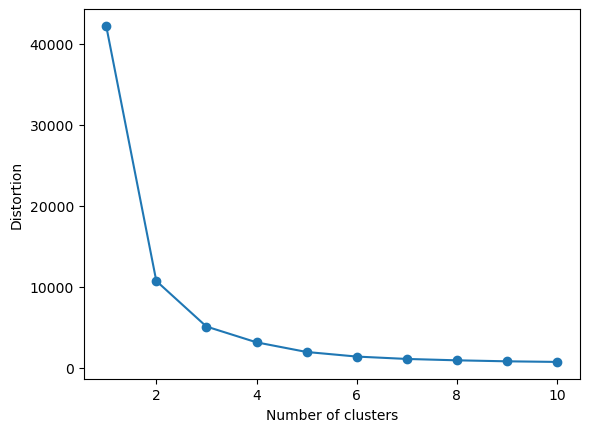

In [31]:
# find number of cluster
from sklearn.cluster import KMeans 
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#elbow

In [32]:
# perform clustering
km = KMeans(n_clusters = 3, random_state=0)
km.fit(X)

KMeans(n_clusters=3, random_state=0)

In [33]:
cluster_data_new = cluster_data.copy()
cluster_data_new.insert(0, "cluster", km.labels_, True)
cluster_data_new.head()

,cluster,PART_OF_DAY,AGE_RANGE
0,1,Night,28.0
1,1,Night,32.0
2,1,Night,30.0
4,1,Night,34.0
8,1,Night,30.0


In [34]:
cluster_0 = cluster_data_new[cluster_data_new['cluster'] == 0]
cluster_1 = cluster_data_new[cluster_data_new['cluster'] == 1]
cluster_2 = cluster_data_new[cluster_data_new['cluster'] == 2]

In [35]:
cluster_0['AGE_RANGE'].unique() #48 - 55

array([55., 50., 51., 48., 49., 54., 53., 52.])

In [36]:
cluster_1['AGE_RANGE'].unique() #28 - 37

array([28., 32., 30., 34., 35., 31., 36., 29., 33., 37.])

In [37]:
cluster_2['AGE_RANGE'].unique() #38 - 47

array([44., 42., 40., 39., 46., 43., 45., 38., 41., 47.])

In [38]:
mappingtoplot2 = {0: '48 - 55', 1: '28 - 37', 2: '38 - 47'}

cluster_data_plot = cluster_data_new.copy()
cluster_data_plot['cluster'] = cluster_data_plot['cluster'].map(mappingtoplot2)

# display result
chart = alt.Chart(cluster_data_plot).mark_bar().encode(
    alt.X('cluster', axis=alt.Axis(title=None, labels=False)),
    alt.Y('count(AGE_RANGE)'),
    alt.Column('PART_OF_DAY'),
    alt.Color('cluster', scale=alt.Scale(range=["#AAFF00","#097969", "#454B1B"]))
).properties(
    width=200  
)
chart

alt.Chart(...)

### 3. What is the common attire worn by the customer?

In [39]:
customerAttire = laundry.copy()

attire = customerAttire['ATTIRE'].value_counts().reset_index()
attire = attire.rename(columns={'index':'ATTIRE', 'ATTIRE':'FREQUENCY'})
fig = px.bar(attire, x='ATTIRE', y='FREQUENCY',title="Distribution of Attire") 
fig.show()

In [40]:
unique_clothes = customerAttire[['SHIRT_COLOUR', 'SHIRT_TYPE', 'PANTS_COLOUR', 'PANTS_TYPE']].values.ravel()
unique_clothes = pd.unique(unique_clothes)
print(unique_clothes)

['blue' 'short_sleeve' 'black' 'short' 'white' 'blue_jeans' 'long' 'red'
 'yellow' 'brown' 'long sleeve' 'grey' 'green' 'purple' 'pink' 'orange'
 'blue ' 'black ']


In [41]:
customerAttire['SHIRT_COLOUR'] = customerAttire['SHIRT_COLOUR'].astype(str) + '_shirt'
customerAttire['PANTS_COLOUR'] = customerAttire['PANTS_COLOUR'].astype(str) + '_pants'
customerAttire['PANTS_TYPE'] = customerAttire['PANTS_TYPE'].astype(str) + '_pants'

In [42]:
def top5clothes(df) : 
    customerClothes = df[['SHIRT_COLOUR', 'SHIRT_TYPE', 'PANTS_COLOUR', 'PANTS_TYPE']]
    records = []
    count_row = customerClothes.shape[0]
    for i in range(0, count_row):
        records.append([str(customerClothes.values[i,j]) for j in range(0, 4)])
        
    association_rules = apriori(records, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 3)
    association_result = list(association_rules)

    cnt =0

    for item in association_result:
        cnt += 1
        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(round(item[1],3)))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(round(item[2][0][2],4)))
        print("Lift: " + str(round(item[2][0][3],4)))
        print("=====================================")

        if cnt > 4: break

In [43]:
casual = customerAttire[customerAttire['ATTIRE'] == 'casual'].reset_index()
formal = customerAttire[customerAttire['ATTIRE'] == 'formal'].reset_index()
traditional = customerAttire[customerAttire['ATTIRE'] == 'traditional'].reset_index()

Casual

In [44]:
print ('Casual Attire')
print("=====================================")
casualAttire = top5clothes(casual)
print (casualAttire)

Casual Attire
(Rule 1) long sleeve -> brown_shirt
Support: 0.026
Confidence: 0.4333
Lift: 3.0155
(Rule 2) pink_pants -> green_shirt
Support: 0.01
Confidence: 0.4167
Lift: 6.0476
(Rule 3) purple_shirt -> purple_pants
Support: 0.006
Confidence: 0.25
Lift: 7.0556
(Rule 4) brown_shirt -> long sleeve
Support: 0.016
Confidence: 0.2667
Lift: 3.8705
(Rule 5) long sleeve -> black_pants
Support: 0.008
Confidence: 0.3333
Lift: 4.8381
None


Formal

In [45]:
print ('Formal Attire')
print("=====================================")
formalAttire = top5clothes(formal)
print (formalAttire)

Formal Attire
(Rule 1) blue_pants -> brown_shirt
Support: 0.025
Confidence: 0.2222
Lift: 8.7778
(Rule 2) grey_shirt -> brown_pants
Support: 0.013
Confidence: 0.25
Lift: 4.9375
(Rule 3) orange_shirt -> brown_pants
Support: 0.025
Confidence: 0.5
Lift: 6.5833
(Rule 4) red_shirt -> grey_pants
Support: 0.025
Confidence: 0.2857
Lift: 3.2245
(Rule 5) pink_pants -> pink_shirt
Support: 0.025
Confidence: 1.0
Lift: 9.875
None


Traditional

In [46]:
print ('Traditional Attire')
print("=====================================")
traditionalAttire = top5clothes(traditional)
print (traditionalAttire)

Traditional Attire
(Rule 1) black_shirt -> black_pants
Support: 0.073
Confidence: 0.3333
Lift: 4.5833
(Rule 2) blue_pants -> blue_shirt
Support: 0.091
Confidence: 0.3846
Lift: 3.5256
(Rule 3) brown_shirt -> brown_pants
Support: 0.073
Confidence: 1.0
Lift: 4.2308
(Rule 4) green_pants -> green_shirt
Support: 0.036
Confidence: 1.0
Lift: 11.0
(Rule 5) grey_pants -> grey_shirt
Support: 0.055
Confidence: 1.0
Lift: 18.3333
None


### 4. Frequency usage for washer and dryer per month

#### WASHER

In [47]:
temp = laundryAnalaysis.copy()

# perform analysis on November
temp['MONTH'] = temp['DATE'].dt.month
a = temp[temp['MONTH']==11]

# get the frequency of washer used based on washer number
a = a['WASHER_NO'].value_counts()
washerFreq = pd.DataFrame(data=a)
washerFreq['index1'] = washerFreq.index
washerFreq.reset_index(drop=True, inplace=True)
washerFreq.columns = ['FREQUENCY','WASHER_NO']
washerFreq = washerFreq[['WASHER_NO', 'FREQUENCY']]
print('Frequency of washer used per month is: ', washerFreq['FREQUENCY'].sum())

# display the result
washerFreq['WASHER_NO'] = washerFreq['WASHER_NO'].astype(str)
bars = alt.Chart(washerFreq).mark_bar().encode(
    x='WASHER_NO',
    y='FREQUENCY',
    color=alt.Color('WASHER_NO')

).properties(
    width=700,
    height=500
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dy=-10  
).encode(
    text='FREQUENCY'
)
q5wahser = bars + text
q5wahser

Frequency of washer used per month is:  512


alt.LayerChart(...)

#### DRYER

In [48]:
temp = laundryAnalaysis.copy()

# perform analysis on November
temp['MONTH'] = temp['DATE'].dt.month
a = temp[temp['MONTH']==11]

# get the frequency of dryer used based on dryer number
a = a['DRYER_NO'].value_counts()
dryerFreq = pd.DataFrame(data=a)
dryerFreq['index1'] = dryerFreq.index
dryerFreq.reset_index(drop=True, inplace=True)
dryerFreq.columns = ['FREQUENCY','DRYER_NO']
dryerFreq = dryerFreq[['DRYER_NO', 'FREQUENCY']]
print('Frequency of dryer used per month is: ', dryerFreq['FREQUENCY'].sum())

# display the result
dryerFreq['DRYER_NO'] = dryerFreq['DRYER_NO'].astype(str)
bars = alt.Chart(dryerFreq).mark_bar().encode(
    x='DRYER_NO',
    y='FREQUENCY',
    color=alt.Color('DRYER_NO')

).properties(
    width=700,
    height=500
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dy=-10  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='FREQUENCY'
)
q5dryer = bars + text
q5dryer

Frequency of dryer used per month is:  512


alt.LayerChart(...)

### 5. Which dryer and washing machine are frequently used together? 

In [49]:
import warnings
warnings.filterwarnings("ignore")

# add tag infront of wahser/dryer number
washerAndDryer = laundryAnalaysis[['WASHER_NO','DRYER_NO']]
washerAndDryer['WASHER_NO'] = 'WASHER ' + washerAndDryer['WASHER_NO'].astype(str)
washerAndDryer['DRYER_NO'] = 'DRYER ' + washerAndDryer['DRYER_NO'].astype(str)
records = washerAndDryer.values.tolist()

display(records)


[['WASHER 3', 'DRYER 10'],
 ['WASHER 6', 'DRYER 9'],
 ['WASHER 4', 'DRYER 10'],
 ['WASHER 3', 'DRYER 9'],
 ['WASHER 6', 'DRYER 10'],
 ['WASHER 3', 'DRYER 9'],
 ['WASHER 3', 'DRYER 8'],
 ['WASHER 4', 'DRYER 7'],
 ['WASHER 5', 'DRYER 10'],
 ['WASHER 3', 'DRYER 10'],
 ['WASHER 5', 'DRYER 7'],
 ['WASHER 3', 'DRYER 8'],
 ['WASHER 5', 'DRYER 9'],
 ['WASHER 3', 'DRYER 8'],
 ['WASHER 3', 'DRYER 7'],
 ['WASHER 5', 'DRYER 9'],
 ['WASHER 4', 'DRYER 9'],
 ['WASHER 5', 'DRYER 9'],
 ['WASHER 4', 'DRYER 8'],
 ['WASHER 6', 'DRYER 9'],
 ['WASHER 3', 'DRYER 7'],
 ['WASHER 6', 'DRYER 8'],
 ['WASHER 5', 'DRYER 7'],
 ['WASHER 3', 'DRYER 9'],
 ['WASHER 4', 'DRYER 8'],
 ['WASHER 5', 'DRYER 10'],
 ['WASHER 5', 'DRYER 9'],
 ['WASHER 5', 'DRYER 7'],
 ['WASHER 3', 'DRYER 9'],
 ['WASHER 6', 'DRYER 7'],
 ['WASHER 6', 'DRYER 8'],
 ['WASHER 3', 'DRYER 10'],
 ['WASHER 6', 'DRYER 10'],
 ['WASHER 5', 'DRYER 8'],
 ['WASHER 3', 'DRYER 8'],
 ['WASHER 4', 'DRYER 10'],
 ['WASHER 3', 'DRYER 9'],
 ['WASHER 5', 'DRYER 10'],
 [

In [50]:
# apply apriori algorithm with support = 0.45%, confidence =20%, lift = 3.000
association_results = apriori(records, min_support=0.060, min_confidence=0.3, min_lift=1, min_length=1)
association_results = list(association_results)
print(len(association_results))

4


In [51]:
cnt =0

dryer = []
washer = []

for item in association_results[:10]:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + str(items[0]) + " -> " + str(items[1]))

    dryer.append(str(items[0]))
    washer.append(str(items[1]))

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) WASHER 6 -> DRYER 10
Support: 0.089
Confidence: 0.3497
Lift: 1.3524
(Rule 2) DRYER 7 -> WASHER 3
Support: 0.112
Confidence: 0.3789
Lift: 1.3294
(Rule 3) WASHER 4 -> DRYER 8
Support: 0.072
Confidence: 0.3007
Lift: 1.4089
(Rule 4) DRYER 9 -> WASHER 5
Support: 0.07
Confidence: 0.3309
Lift: 1.3617


### 6. What are the potential locations to open a new laundry based on the population of housing areas? 


#### Overall

In [52]:
topOverall = residentalLocationAnalysis.sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topOverall = residentalLocationAnalysis.sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topOverall = topOverall.iloc[:10,:]
topOverall['RESIDENTAL_AREA_STATE'] = topOverall["RESIDENTAL_AREA"] + "," + topOverall["STATE"]

locationOverall = alt.Chart(topOverall).mark_bar().encode(
    y='RESIDENTAL_AREA_STATE',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 4000,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationOverall.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

left = alt.Chart(locationOverall).mark_text().encode(
    alt.Y('STATE', sort=alt.EncodingSortField('PERCENT', order="descending"), title=None)
)

locationOverall = (locationOverall + text).properties(height=500, width=900)
locationOverall

alt.LayerChart(...)

#### Kelantan

In [53]:
topKelantan = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Kelantan'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topKelantan = topKelantan.iloc[:10,:]

locationKelantan = alt.Chart(topKelantan).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 900,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationKelantan.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationKelantan = (locationKelantan + text).properties(height=500, width=700)
locationKelantan

alt.LayerChart(...)

#### Negeri Sembilan

In [54]:
topN9 = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Negeri Sembilan'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topN9 = topN9.iloc[:10,:]

locationN9 = alt.Chart(topN9).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 4000,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationN9.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationN9 = (locationN9 + text).properties(height=500, width=700)
locationN9

alt.LayerChart(...)

#### Pahang

In [55]:
topPahang = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Pahang'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topPahang = topPahang.iloc[:10,:]

locationPahang = alt.Chart(topPahang).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 400,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationPahang.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationPahang = (locationPahang + text).properties(height=500, width=700)
locationPahang

alt.LayerChart(...)

#### Perak


In [56]:
topPerak = residentalLocationAnalysis[residentalLocationAnalysis['STATE']=='Perak'].sort_values(by=['NUMBER_OF_HOUSES'],ascending=False)
topPerak = topPerak.iloc[:10,:]

locationPerak = alt.Chart(topPerak).mark_bar().encode(
    y='RESIDENTAL_AREA',
    x='NUMBER_OF_HOUSES',
    color=alt.condition(
        alt.datum.NUMBER_OF_HOUSES >= 100,  # If the year is 1810 this test returns True,
        alt.value('green'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

text = locationPerak.mark_text( 
    align='left',
    baseline='middle',
    dx=5  
).encode(
    text='NUMBER_OF_HOUSES'
)

locationPerak = (locationPerak + text).properties(height=500, width=700)
locationPerak

alt.LayerChart(...)

### 7. What is the customer body size for the dryer and washing machine?

In [57]:
dryerWasherPair = pd.DataFrame(
    {'Dryer': dryer,
     'Washer': washer})
dryerWasherPair

,Dryer,Washer
0,WASHER 6,DRYER 10
1,DRYER 7,WASHER 3
2,WASHER 4,DRYER 8
3,DRYER 9,WASHER 5


In [58]:
customerSize = laundry[['BODY_SIZE', 'DRYER_NO', 'WASHER_NO']]
rule1 = customerSize[(customerSize['DRYER_NO'] == 10) & (customerSize['WASHER_NO'] == 6)]
rule1['RULE'] = '1'

rule2 = customerSize[(customerSize['DRYER_NO'] == 7) & (customerSize['WASHER_NO'] == 3)]
rule2['RULE'] = '2'

rule3 = customerSize[(customerSize['DRYER_NO'] == 8) & (customerSize['WASHER_NO'] == 4)]
rule3['RULE'] = '3'

rule4 = customerSize[(customerSize['DRYER_NO'] == 9) & (customerSize['WASHER_NO'] == 4)]
rule4['RULE'] = '4'

In [59]:
merged_df = pd.concat([rule1, rule2, rule3, rule4]).reset_index(drop=True)

bodySize = merged_df.groupby(['BODY_SIZE', 'RULE']).size().reset_index()
bodySize = bodySize.rename(columns={0:'FREQUENCY'})

bodySize

,BODY_SIZE,RULE,FREQUENCY
0,fat,1,17
1,fat,2,28
2,fat,3,13
3,fat,4,6
4,moderate,1,23
5,moderate,2,31
6,moderate,3,16
7,moderate,4,9
8,thin,1,17
9,thin,2,13


In [60]:
alt.Chart(bodySize).mark_bar().encode(
    x='BODY_SIZE:O',
    y='FREQUENCY:Q',
    color='BODY_SIZE:N',
    column='RULE:N'
)

alt.Chart(...)

# Feature Selection

In [61]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [62]:
# function utilities
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Label Encode First before do Feature Selection

In [63]:
# perform label encoding
laundry_FS = laundry.copy()
col_list = [col for col in laundry_FS.columns.tolist() if laundry_FS[col].dtype.name == "object" or laundry_FS[col].dtype.name == "category" or laundry_FS[col].dtype.name == "datetime64[ns]"]
df_oh = laundry_FS[col_list]
df_FS = laundry_FS.drop(col_list, 1)
df_oh = df_oh.apply(LabelEncoder().fit_transform)
df_FS = pd.concat([df_FS, df_oh], axis=1)
df_FS = df_FS.drop(['NO'],axis=1)
df_FS

,AGE_RANGE,WASHER_NO,DRYER_NO,DATE,TIME,RACE,GENDER,BODY_SIZE,WITH_KIDS,KIDS_CATEGORY,...,ATTIRE,SHIRT_COLOUR,SHIRT_TYPE,PANTS_COLOUR,PANTS_TYPE,WASH_ITEM,SPECTACLES,PART_OF_DAY,PART_OF_WEEK,AGE_CATEGORY
0,28.0,3,10,0,306,3,1,1,1,4,...,0,2,1,0,1,1,0,1,1,2
1,32.0,6,9,0,311,2,1,2,0,1,...,0,10,1,4,0,1,0,1,1,0
2,30.0,4,10,0,329,3,0,1,0,1,...,0,9,1,0,0,1,0,1,1,2
4,34.0,3,9,0,354,2,1,1,0,1,...,0,2,1,12,0,1,0,1,1,0
8,30.0,6,10,1,12,2,1,2,0,1,...,0,10,1,0,1,1,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,45.0,3,10,23,297,3,0,1,0,1,...,0,9,0,0,0,1,0,1,6,0
803,34.0,3,7,23,315,3,1,0,0,1,...,0,10,1,0,0,0,0,1,6,0
804,53.0,3,7,23,316,3,0,1,0,1,...,2,7,0,9,0,1,1,1,6,1
805,37.0,6,10,23,318,2,0,1,0,1,...,2,3,1,0,0,1,0,1,6,0


### 1. What is the feature selection technique used? And Why?

Feature selection used: BORUTA

#### Y = Part of Day

In [64]:
df_FS1 = df_FS.copy()
df_FS1 = df_FS1.drop(['TIME'], axis=1)
y_partDay = df_FS1['PART_OF_DAY']
X_partDay = df_FS1.drop(['PART_OF_DAY'], axis=1)

# PERFORM BORUTA
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector_partDay = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector_partDay.fit(X_partDay.values, y_partDay.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=126, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FD1D049B740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD1D049B740)

#### Y = age

In [65]:
df_FS2 = df_FS.copy()
y_AGE = df_FS2['AGE_RANGE']
X_AGE = df_FS2.drop(['AGE_RANGE','AGE_CATEGORY'], axis=1)

# your codes here...
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector_AGE = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector_AGE.fit(X_AGE.values, y_AGE.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FD1D049BD40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD1D049BD40)

### 2. How should I obtain the optimal feature set?

Ans: Obtaining Top 10 features

#### Y = Part of Day

In [66]:
print('---------Top 10----------')
# your codes here...
# get ranking returned by boruta 
colnames = X_partDay.columns
boruta_score_partDay = ranking(list(map(float, feat_selector_partDay.ranking_)), colnames, order=-1)
boruta_score_partDay = pd.DataFrame(list(boruta_score_partDay.items()), columns=["features","score"])
boruta_score_partDay = boruta_score_partDay.sort_values("score", ascending=False)

# features = ['PART_OF_WEEK','DATE','TIME','AGE_RANGE','PANTS_COLOUR','RACE','BASKET_COLOUR','PANTS_TYPE','SHIRT_COLOUR','WASHER_NO']
# score = [1.00,1.00,0.94,0.83,0.61,0.44,0.39,0.33,0.22,0.11]
# boruta_score_partDay = pd.DataFrame(data=features, columns=["features"])
# boruta_score_partDay['score'] = score

#display top 10
display(boruta_score_partDay.head(10))
type(boruta_score_partDay)

---------Top 10----------


,features,score
0,AGE_RANGE,1.00
18,PART_OF_WEEK,1.00
3,DATE,1.00
14,PANTS_COLOUR,0.94
10,BASKET_COLOUR,0.88
4,RACE,0.82
12,SHIRT_COLOUR,0.76
1,WASHER_NO,0.71
15,PANTS_TYPE,0.71
11,ATTIRE,0.59


pandas.core.frame.DataFrame

#### Y = Age

In [67]:
colnames = X_AGE.columns
boruta_score_AGE = ranking(list(map(float, feat_selector_AGE.ranking_)), colnames, order=-1)
boruta_score_AGE = pd.DataFrame(list(boruta_score_AGE.items()), columns=["features","score"])
boruta_score_AGE = boruta_score_AGE.sort_values("score", ascending=False)

#display top 10
display(boruta_score_AGE.head(10))
type(boruta_score_AGE)

,features,score
3,TIME,1.00
2,DATE,0.95
10,BASKET_COLOUR,0.89
12,SHIRT_COLOUR,0.84
14,PANTS_COLOUR,0.79
19,PART_OF_WEEK,0.74
4,RACE,0.68
1,DRYER_NO,0.63
0,WASHER_NO,0.58
6,BODY_SIZE,0.53


pandas.core.frame.DataFrame

### 3. Do I need to perform data imbalance treatment?
Yes, we performed SMOTE for data imbalance treatment

In [68]:
# before SMOTE
a = df_FS1["PART_OF_DAY"].value_counts()
df = pd.DataFrame()
df['x'] = a.index.astype(str)
df['y'] = a.values
df
bar = alt.Chart(df).mark_bar(size=100).encode(
    x='x',
    y='y',
    color='x'
).properties(width=300,height=300)

text = bar.mark_text(
    align='left',
    baseline='middle',
    dy=-10  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='y'
)

after = bar+text
after

alt.LayerChart(...)

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


partDaytop10 = ['AGE_RANGE',
 'PART_OF_WEEK',
 'DATE',
 'PANTS_COLOUR',
 'BASKET_COLOUR',
 'RACE',
 'SHIRT_COLOUR',
 'WASHER_NO',
 'PANTS_TYPE',
 'ATTIRE']
X_partDay = df_FS1[partDaytop10]
y_partDay = df_FS1['PART_OF_DAY']

smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X_partDay, y_partDay)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=10)

In [70]:
# after oversampling with SMOTE
print(y_res.value_counts())

a = y_res.value_counts()
df = pd.DataFrame()
df['x'] = a.index.astype(str)
df['y'] = a.values
df
bar = alt.Chart(df).mark_bar(size=100).encode(
    x='x',
    y='y',
    color='x'
).properties(width=300,height=300)

text = bar.mark_text(
    align='left',
    baseline='middle',
    dy=-10  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='y'
)
after = bar+text
after

1    343
0    343
Name: PART_OF_DAY, dtype: int64


alt.LayerChart(...)

In [71]:
a = y_res.value_counts()
a.index

df = pd.DataFrame()
df['x'] = a.index.astype(str)
df['y'] = a.values
df

,x,y
0,1,343
1,0,343


# Model Building

## Classification Model
Given the features, predict which part of the day does customer visit the laundry ?

Compare naive bayes, decision tree and random forest classification to determine which classifier is the most suitable model.

In [72]:
%matplotlib inline
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import preprocessing # label encoding
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split functionn

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import matplotlib.pyplot as plt
from sklearn import tree

In [73]:
partDaytop10 = boruta_score_partDay.head(10)
# partDaytop10 = ['PART_OF_WEEK','DATE','TIME','AGE_RANGE','PANTS_COLOUR','RACE','BASKET_COLOUR','PANTS_TYPE','SHIRT_COLOUR','WASHER_NO']

X_partDay = df_FS[partDaytop10['features']]
y_partDay = df_FS['PART_OF_DAY']

In [74]:
partDaytop10['features'].to_list()

['AGE_RANGE',
 'PART_OF_WEEK',
 'DATE',
 'PANTS_COLOUR',
 'BASKET_COLOUR',
 'RACE',
 'SHIRT_COLOUR',
 'WASHER_NO',
 'PANTS_TYPE',
 'ATTIRE']

In [75]:
X_train_partDay, X_test_partDay, y_train_partDay, y_test_partDay = train_test_split(X_partDay, y_partDay, test_size=0.3, random_state=0)

print(X_train_partDay.shape)
print(y_train_partDay.shape)
print(X_test_partDay.shape)
print(y_test_partDay.shape)

(449, 10)
(449,)
(193, 10)
(193,)


### Naive Bayes, Decision Tree and Random Forest Model

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


nb_partDay = GaussianNB()
nb_partDay.fit(X_train_partDay, y_train_partDay)
y_pred_nb_partDay = nb_partDay.predict(X_test_partDay)
nb_partDay_acc = nb_partDay.score(X_test_partDay, y_test_partDay)
print("Accuracy NB: ", nb_partDay_acc)

dt_gini_partDay = DecisionTreeClassifier()
dt_gini_partDay = dt_gini_partDay.fit(X_train_partDay, y_train_partDay)

y_pred_dt_gini_partDay = dt_gini_partDay.predict(X_test_partDay)
dt_gini_partDay_acc = dt_gini_partDay.score(X_test_partDay, y_test_partDay)
print("Accuracy DT: ", dt_gini_partDay_acc)

RF_partDay = RandomForestClassifier(max_depth=3, random_state=0)
RF_partDay.fit(X_train_partDay, y_train_partDay)
y_pred_rf_partDay = RF_partDay.predict(X_test_partDay)
rf_partDay_acc = RF_partDay.score(X_test_partDay, y_test_partDay)
print("Accuracy RF: ", rf_partDay_acc)

Accuracy NB:  0.5544041450777202
Accuracy DT:  0.6010362694300518
Accuracy RF:  0.6580310880829016


### Model Performance

Accuracy 

In [77]:
modelAccuracy = {'Model': ['Naive_Bayes','Decision_Tree', 'Random_Forest'], 
'Accuracy':[nb_partDay_acc,dt_gini_partDay_acc,rf_partDay_acc]}

modelAccuracy = pd.DataFrame(modelAccuracy)
modelAccuracy

,Model,Accuracy
0,Naive_Bayes,0.554404
1,Decision_Tree,0.601036
2,Random_Forest,0.658031


In [78]:
alt.Chart(modelAccuracy).mark_bar().encode(
    x='Model:O',
    y="Accuracy:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Accuracy > 0.65, 
        alt.value('orange'),     
        alt.value('steelblue')   
    )
).properties(width=600)

alt.Chart(...)

ROC - Random Forest

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, RF_partDay.predict_proba(X_test)[:,1])
roc_rf = pd.DataFrame()
roc_rf['fpr'] = fpr
roc_rf['tpr'] = tpr
roc_rf['thresholds'] = thresholds
roc_rf.head()

baseline = alt.Chart(roc_rf).mark_line(strokeDash=[20,5], color = 'black').encode(
                                                                alt.X('thresholds', scale = alt.Scale(domain=[0, 1])),
                                                                alt.Y('thresholds', scale = alt.Scale(domain=[0, 1])))
roc_line = alt.Chart(roc_rf).mark_line(color = 'red').encode(
                                                                alt.X('fpr', title="false positive rate"),
                                                                alt.Y('tpr', title="true positive rate"))

roc_line + baseline.properties(title='Random Forest ROC curve ').interactive()

alt.LayerChart(...)

### SMOTED - Naive Bayes, Decision Tree and Random Forest Mode

In [80]:
nb_partDay_SMOTE = GaussianNB()
nb_partDay_SMOTE.fit(X_train, y_train)
nb_partDay_acc_SMOTE = nb_partDay_SMOTE.score(X_test, y_test)
print("accuracy NB after smote:", nb_partDay_acc_SMOTE)


dt_gini_partDay_SMOTE = DecisionTreeClassifier()
dt_gini_partDay_SMOTE = dt_gini_partDay.fit(X_train, y_train)
knn_partDay_acc_SMOTE = dt_gini_partDay_SMOTE.score(X_test, y_test)
print("accuracy DT after smote:", knn_partDay_acc_SMOTE)

RF_partDay_SMOTE = RandomForestClassifier(max_depth=3, random_state=0)
RF_partDay_SMOTE.fit(X_train, y_train)
rf_partDay_acc_SMOTE = RF_partDay_SMOTE.score(X_test, y_test)
print("accuracy RF after smote:", rf_partDay_acc_SMOTE)

accuracy NB after smote: 0.5781818181818181
accuracy DT after smote: 0.5745454545454546
accuracy RF after smote: 0.6872727272727273


Model Performance (SMOTED)

Accuracy - SMOTED

In [81]:
modelAccuracySMOTED = {'Model (SMOTED)': ['Naive_Bayes','Decision_Tree', 'Random_Forest'], 
'Accuracy':[nb_partDay_acc_SMOTE,knn_partDay_acc_SMOTE,rf_partDay_acc_SMOTE]}

modelAccuracySMOTED = pd.DataFrame(modelAccuracySMOTED)
modelAccuracySMOTED

,Model (SMOTED),Accuracy
0,Naive_Bayes,0.578182
1,Decision_Tree,0.574545
2,Random_Forest,0.687273


In [82]:
alt.Chart(modelAccuracySMOTED).mark_bar().encode(
    x='Model (SMOTED):O',
    y="Accuracy:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Accuracy > 0.65, 
        alt.value('orange'),     
        alt.value('steelblue')   
    )
).properties(width=600)

alt.Chart(...)

ROC - Random Forest (SMOTED)

In [95]:
from sklearn.metrics import roc_curve

fpr_SMOTED, tpr_SMOTED, thresholds_SMOTED = roc_curve(y_test, RF_partDay_SMOTE.predict_proba(X_test)[:,1])
roc_rf_SMOTED = pd.DataFrame()
roc_rf_SMOTED['fpr'] = fpr_SMOTED
roc_rf_SMOTED['tpr'] = tpr_SMOTED
roc_rf_SMOTED['thresholds'] = thresholds_SMOTED
roc_rf_SMOTED.head()

baseline = alt.Chart(roc_rf_SMOTED).mark_line(strokeDash=[20,5], color = 'black').encode(
                                                                alt.X('thresholds', scale = alt.Scale(domain=[0, 1])),
                                                                alt.Y('thresholds', scale = alt.Scale(domain=[0, 1])))
roc_line = alt.Chart(roc_rf_SMOTED).mark_line(color = 'red').encode(
                                                                alt.X('fpr', title="false positive rate"),
                                                                alt.Y('tpr', title="true positive rate"))

roc_line + baseline.properties(title='Random Forest (SMOTED) ROC curve ').interactive()


alt.LayerChart(...)

## Regression Model

In [84]:
cols = boruta_score_AGE['features'].head(9)
X_AGE = df_FS[cols]
y_AGE = df_FS['AGE_RANGE']

X_AGE_train, X_AGE_test, Y_AGE_train, Y_AGE_test = train_test_split(X_AGE, y_AGE, test_size = 0.30, random_state = 0)

### Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression




lr_AGE = LinearRegression().fit(X_AGE_train, Y_AGE_train)

lr_acc = lr_AGE.score(X_AGE_test, Y_AGE_test)
lr_acc

-0.007759540638997198

### Decision Tree Regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor  

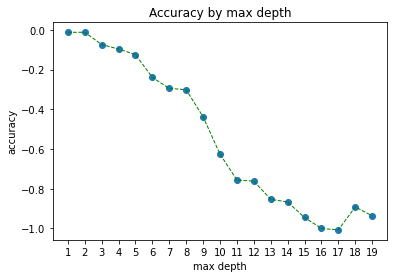

In [87]:
md_range = range(1,20)
scores = []

# your codes here...
for i in md_range:
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_AGE_train, Y_AGE_train)
    scores.append(dt.score(X_AGE_test, Y_AGE_test))

plt.figure()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('Accuracy by max depth')
plt.scatter(md_range, scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.plot(md_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)

In [88]:
dt_AGE = DecisionTreeRegressor(max_depth=2)
dt_AGE.fit(X_AGE_train, Y_AGE_train)

dt_acc = dt_AGE.score(X_AGE_test, Y_AGE_test)
dt_acc

-0.012042219708629842

### SVM (RBF, POLY, LINEAR)

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


svr_rbf_AGE = SVR(kernel = 'rbf')
svr_rbf_AGE.fit(X_AGE_train, Y_AGE_train)

svr_rbf_AGE_acc = svr_rbf_AGE.score(X_AGE_test, Y_AGE_test)
svr_rbf_AGE_acc

0.011898318214972337

In [90]:
svr_poly_AGE = SVR(kernel = 'poly')
svr_poly_AGE.fit(X_AGE_train, Y_AGE_train)

svr_poly_AGE_acc = svr_poly_AGE.score(X_AGE_test, Y_AGE_test)
svr_poly_AGE_acc

0.00014177671381099266

In [91]:
svr_linear_AGE = SVR(kernel = 'linear')
svr_linear_AGE.fit(X_AGE_train, Y_AGE_train)

svr_linear_AGE_acc = svr_linear_AGE.score(X_AGE_test, Y_AGE_test)
svr_linear_AGE_acc

-0.02069652599592442

### Model evaluation

In [92]:
modelAccuracyReg = {'Model': ['Linear_Regression','Decision_Tree', 'Support Vector Regressor'], 
'Accuracy':[lr_acc,dt_acc,svr_rbf_AGE_acc]}

modelAccuracyRegression = pd.DataFrame(modelAccuracyReg)
modelAccuracyRegression

,Model,Accuracy
0,Linear_Regression,-0.007760
1,Decision_Tree,-0.012042
2,Support Vector Regressor,0.011898


In [93]:
alt.Chart(modelAccuracyRegression).mark_bar().encode(
    x='Model:O',
    y="Accuracy:Q",
    color=alt.condition(
        alt.datum.Accuracy > 0, 
        alt.value('green'),     
        alt.value('red')   
    )
).properties(width=600)

alt.Chart(...)